In [84]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Question 1 a)

In [38]:
train_office_df = pd.read_csv("train_office.csv")
train_office_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.250000,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.000000,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.500000,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.250000,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
7341,2/10/2015 9:29,21.05,36.0975,433.0,787.250000,0.005579,1
7342,2/10/2015 9:29,21.05,35.9950,433.0,789.500000,0.005563,1
7343,2/10/2015 9:30,21.10,36.0950,433.0,798.500000,0.005596,1
7344,2/10/2015 9:32,21.10,36.2600,433.0,820.333333,0.005621,1


In [39]:
# train_office_df = pd.to_datetime(train_office_df.date)
train_office_df = train_office_df.drop(['date'], axis=1)

In [40]:
train_office_df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [41]:
X = train_office_df.drop(['Occupancy'], axis=1)
X

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.250000,0.004793
1,23.15,27.2675,429.5,714.000000,0.004783
2,23.15,27.2450,426.0,713.500000,0.004779
3,23.15,27.2000,426.0,708.250000,0.004772
4,23.10,27.2000,426.0,704.500000,0.004757
...,...,...,...,...,...
7341,21.05,36.0975,433.0,787.250000,0.005579
7342,21.05,35.9950,433.0,789.500000,0.005563
7343,21.10,36.0950,433.0,798.500000,0.005596
7344,21.10,36.2600,433.0,820.333333,0.005621


In [42]:
Y = pd.DataFrame(train_office_df.Occupancy.copy())
Y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
7341,1
7342,1
7343,1
7344,1


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=1)

In [52]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [57]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.9585034 , 0.95371001, 0.79782165, 0.98025868, 0.91218516])

In [59]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.92 (+/- 0.13)


In [68]:
max_depths = [1, 5, 10, 50, 100]
tree_accuracy = []

for depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, Y, cv=5)
    print("Depth: ", depth)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
    tree_accuracy.append(scores.mean())

Depth:  1
Accuracy: 0.98 (+/- 0.05)
Depth:  5
Accuracy: 0.93 (+/- 0.08)
Depth:  10
Accuracy: 0.92 (+/- 0.12)
Depth:  50
Accuracy: 0.92 (+/- 0.14)
Depth:  100
Accuracy: 0.92 (+/- 0.11)


C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.9, 1.0)

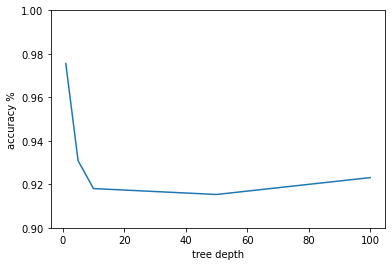

In [80]:
sns.lineplot(max_depths, tree_accuracy)
plt.xlabel("tree depth")
plt.ylabel("accuracy %")
plt.ylim([0.9, 1])

In [70]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 2, 3, 4, 5, 10, 15]
knn_accuracy = []

for k in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, X, np.ravel(Y), cv=5)
    print("Neighbors: ", k)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
    knn_accuracy.append(scores.mean())


Neighbors:  1
Accuracy: 0.94 (+/- 0.16)
Neighbors:  2
Accuracy: 0.94 (+/- 0.12)
Neighbors:  3
Accuracy: 0.94 (+/- 0.14)
Neighbors:  4
Accuracy: 0.95 (+/- 0.13)
Neighbors:  5
Accuracy: 0.95 (+/- 0.12)
Neighbors:  10
Accuracy: 0.95 (+/- 0.10)
Neighbors:  15
Accuracy: 0.96 (+/- 0.08)


C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.9, 1.0)

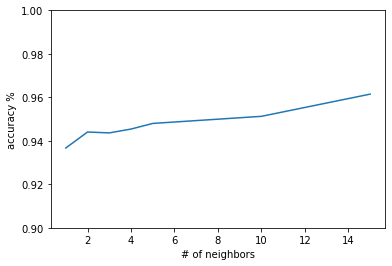

In [81]:
sns.lineplot(neighbors, knn_accuracy)
plt.xlabel("# of neighbors")
plt.ylabel("accuracy %")
plt.ylim([0.9, 1])

In [72]:
from sklearn.linear_model import LogisticRegression

C = [0.001, 0.01, 0.1, 0.5, 1]
LR_accuracy = []

for c in C:
    LR = LogisticRegression(C=c)
    scores = cross_val_score(LR, X, np.ravel(Y), cv=5)
    print("C: ", c)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
    LR_accuracy.append(scores.mean())

C:  0.001
Accuracy: 0.98 (+/- 0.03)
C:  0.01
Accuracy: 0.98 (+/- 0.03)
C:  0.1
Accuracy: 0.98 (+/- 0.03)
C:  0.5
Accuracy: 0.99 (+/- 0.03)
C:  1
Accuracy: 0.98 (+/- 0.03)


C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.9, 1.0)

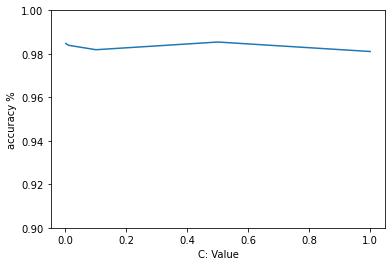

In [82]:
sns.lineplot(C, LR_accuracy)
plt.xlabel("C: Value")
plt.ylabel("accuracy %")
plt.ylim([0.9, 1])

# b) Decision Tree: 1 depth, KNN: 15 nearest neighbors, Logistic Regression: 0.5 C

# c) and d)

In [88]:
test_office_df = pd.read_csv("test_office.csv")
# test_office_df.drop(['date'], axis=1)

X_test_set = test_office_df.drop(['date','Occupancy'], axis=1)
X_test_set

Y_test_set = pd.DataFrame(test_office_df.Occupancy.copy())
Y_test_set

,Occupancy
0,0
1,0
2,0
3,0
4,0
...,...
792,0
793,0
794,1
795,1


## i) Decision tree, KNN, Logistic Regression, confusion matrices are at the top of each output

In [118]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, Y)

ypred = clf.predict(X_test_set)

cm = confusion_matrix(Y_test_set, ypred)
print(cm)

cr = classification_report(Y_test_set, ypred)
print(cr) 


[[641   6]
 [  1 149]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       647
           1       0.96      0.99      0.98       150

    accuracy                           0.99       797
   macro avg       0.98      0.99      0.99       797
weighted avg       0.99      0.99      0.99       797



In [92]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh = neigh.fit(X, np.ravel(Y))

ypred = neigh.predict(X_test_set)

cm = confusion_matrix(Y_test_set, ypred)
print(cm)

cr = classification_report(Y_test_set, ypred)
print(cr) 

[[641   6]
 [  1 149]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       647
           1       0.96      0.99      0.98       150

    accuracy                           0.99       797
   macro avg       0.98      0.99      0.99       797
weighted avg       0.99      0.99      0.99       797



In [94]:
LR = LogisticRegression(C=0.5)
LR = LR.fit(X, np.ravel(Y))

ypred = LR.predict(X_test_set)

cm = confusion_matrix(Y_test_set, ypred)
print(cm)

lr_cr = classification_report(Y_test_set, ypred)
print(lr_cr) 

[[641   6]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       647
           1       0.96      1.00      0.98       150

    accuracy                           0.99       797
   macro avg       0.98      1.00      0.99       797
weighted avg       0.99      0.99      0.99       797



## ii)

In [100]:
methods = ['DecisionTree', 'KNN', 'LogisticRegression']
precision = [0.99, 0.99, 0.99]
recall = [0.99, 0.99, 0.99]
f1_score = [0.99, 0.99, 0.99]

Text(0, 0.5, 'precision')

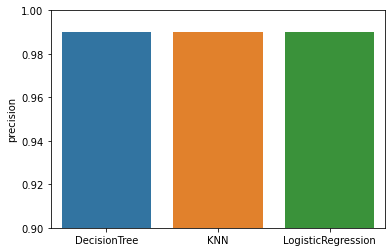

In [104]:
sns.barplot(x=methods, y=precision)
plt.ylim([0.9, 1])
plt.ylabel("precision")

Text(0, 0.5, 'recall')

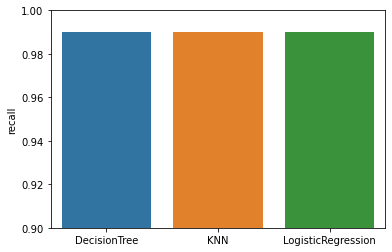

In [105]:
sns.barplot(x=methods, y=precision)
plt.ylim([0.9, 1])
plt.ylabel("recall")

Text(0, 0.5, 'f1-score')

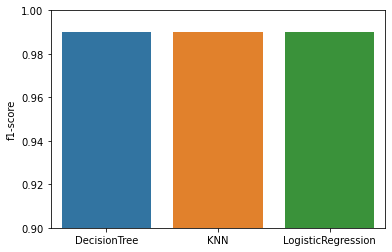

In [106]:
sns.barplot(x=methods, y=precision)
plt.ylim([0.9, 1])
plt.ylabel("f1-score")

## iii)

C:\Users\arist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\arist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\arist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

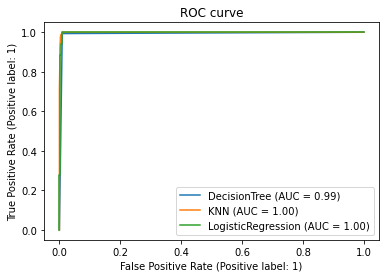

In [113]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
fig, ax = plt.subplots()

models = [
    ("DecisionTree", clf),
    ("KNN", neigh),
    ("LogisticRegression", LR)
]

model_displays = {}
for name, fit in models:
    model_displays[name] = plot_roc_curve(
        fit, X_test_set, Y_test_set, ax=ax, name=name)
_ = ax.set_title('ROC curve')

# e)

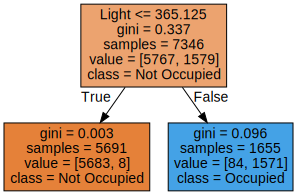

In [122]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'],  
                                class_names=['Not Occupied','Occupied'],
                                filled=True)
# dot_data = tree.export_graphviz(clf)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Question 2

# a)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

params = {'n_estimators': [5, 10, 20, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 10],
          'min_samples_split' : [2, 3, 4, 5], 'min_samples_leaf' : [2, 3, 4, 5] }

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, n_jobs=-1,verbose=1, scoring = "accuracy")

grid_search.fit(X, np.ravel(Y))

grid_search.best_estimator_ 



Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=5)

# b) the Random Forest classifier performs well, similar to the best classifier found in question 1

In [127]:
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=5)

RF_best = grid_search.best_estimator_ 

y_pred= RF_best.predict(X_test_set) 

In [128]:
cm = confusion_matrix(Y_test_set, ypred)
print(cm)

cr = classification_report(Y_test_set, ypred)
print(cr) 

[[641   6]
 [  1 149]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       647
           1       0.96      0.99      0.98       150

    accuracy                           0.99       797
   macro avg       0.98      0.99      0.99       797
weighted avg       0.99      0.99      0.99       797



Text(0.5, 1.0, 'ROC curve')

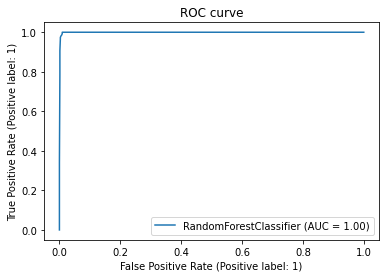

In [138]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(RF_best, X_test_set, Y_test_set)
plt.title('ROC curve')

# Question 3

In [218]:
msft_df = pd.read_csv("msft.csv")
msft_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/30/2016,62.959999,62.990002,62.029999,62.139999,25465900,62.139999
1,12/29/2016,62.860001,63.200001,62.730000,62.900002,10181600,62.900002
2,12/28/2016,63.400002,63.400002,62.830002,62.990002,14247400,62.990002
3,12/27/2016,63.209999,64.070000,63.209999,63.279999,11583900,63.279999
4,12/23/2016,63.450001,63.540001,62.799999,63.240002,12398000,63.240002
...,...,...,...,...,...,...,...
2513,1/9/2007,30.000000,30.180000,29.730000,29.959999,44636600,23.557044
2514,1/8/2007,29.650000,30.100000,29.530001,29.930000,50220200,23.533456
2515,1/5/2007,29.629999,29.750000,29.450001,29.639999,44607200,23.305433
2516,1/4/2007,29.700001,29.969999,29.440001,29.809999,45774500,23.439102


In [219]:
msft_df.isnull().values.any()

False

In [220]:
msft_df['Date'] = pd.to_datetime(msft_df['Date'])    
msft_df['date_delta'] = (msft_df['Date'] - msft_df['Date'].min())  / np.timedelta64(1,'D')
msft_df

,Date,Open,High,Low,Close,Volume,Adj Close,date_delta
0,2016-12-30,62.959999,62.990002,62.029999,62.139999,25465900,62.139999,3649.0
1,2016-12-29,62.860001,63.200001,62.730000,62.900002,10181600,62.900002,3648.0
2,2016-12-28,63.400002,63.400002,62.830002,62.990002,14247400,62.990002,3647.0
3,2016-12-27,63.209999,64.070000,63.209999,63.279999,11583900,63.279999,3646.0
4,2016-12-23,63.450001,63.540001,62.799999,63.240002,12398000,63.240002,3642.0
...,...,...,...,...,...,...,...,...
2513,2007-01-09,30.000000,30.180000,29.730000,29.959999,44636600,23.557044,6.0
2514,2007-01-08,29.650000,30.100000,29.530001,29.930000,50220200,23.533456,5.0
2515,2007-01-05,29.629999,29.750000,29.450001,29.639999,44607200,23.305433,2.0
2516,2007-01-04,29.700001,29.969999,29.440001,29.809999,45774500,23.439102,1.0


In [221]:
X = msft_df.drop(['Date', 'Adj Close'], axis=1)
X

,Open,High,Low,Close,Volume,date_delta
0,62.959999,62.990002,62.029999,62.139999,25465900,3649.0
1,62.860001,63.200001,62.730000,62.900002,10181600,3648.0
2,63.400002,63.400002,62.830002,62.990002,14247400,3647.0
3,63.209999,64.070000,63.209999,63.279999,11583900,3646.0
4,63.450001,63.540001,62.799999,63.240002,12398000,3642.0
...,...,...,...,...,...,...
2513,30.000000,30.180000,29.730000,29.959999,44636600,6.0
2514,29.650000,30.100000,29.530001,29.930000,50220200,5.0
2515,29.629999,29.750000,29.450001,29.639999,44607200,2.0
2516,29.700001,29.969999,29.440001,29.809999,45774500,1.0


In [222]:
Y = pd.DataFrame(msft_df['Adj Close'].copy())
Y

,Adj Close
0,62.139999
1,62.900002
2,62.990002
3,63.279999
4,63.240002
...,...
2513,23.557044
2514,23.533456
2515,23.305433
2516,23.439102


In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=1)

In [224]:
from sklearn.tree import DecisionTreeRegressor

In [225]:

reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,Y_train)
reg_decision_model.score(X_test,Y_test)

0.9985752740927072

# a) note: converted date to days(int) for preprocessing

In [226]:
# params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter': ['best','random'], 'max_depth': [2, 3, 4, 5, 10],
#           'min_samples_split' : [2, 3, 4, 5], 'min_samples_leaf' : [2, 3, 4, 5] }

params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter': ['best','random'], 'max_depth': [2, 3, 4, 5, 10, 20, 30, 50, 100],
         'min_samples_split' : [2, 3, 4, 5], 'min_samples_leaf' : [2, 3, 4, 5] }

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5, n_jobs=-1,verbose=1, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

grid_search.best_estimator_ 

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


DecisionTreeRegressor(criterion='friedman_mse', max_depth=100,
                      min_samples_leaf=3, min_samples_split=5)

# b) RMSE: 0.217

In [228]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=100,
                      min_samples_leaf=3, min_samples_split=5)
DTR.fit(X_train,Y_train)
DTR.score(X_test,Y_test)


# DTR_best = grid_search.best_estimator_ 

y_pred= DTR.predict(X_test) 

In [229]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, Y_test)
print('RMSE: ', rmse)

RMSE:  0.21703042854921595


# c) The best train test split for RMSE performance was 1.0/0 but this is overfitting, 
# the next best option is 0.1/0.9, the size of that training set was about 2250. The two plots below illustrate this

In [230]:
split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rmse_score = []
train_len = []

for s in split:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = s, random_state=1)
    DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=50, min_samples_leaf=2)
    DTR.fit(X_train,Y_train)
    DTR.score(X_test,Y_test)
    train_len.append(len(X_train))
    
    DTR_best = grid_search.best_estimator_ 

    y_pred= DTR.predict(X_test) 
    rmse = mean_squared_error(y_pred, Y_test)
    print('RMSE: ', rmse)
    rmse_score.append(rmse)

RMSE:  0.043333896565347974
RMSE:  0.06195373541483218
RMSE:  0.059392424763402084
RMSE:  0.08703098524187924
RMSE:  0.08434255309773844
RMSE:  0.09339128007256714
RMSE:  0.12713173254301066
RMSE:  0.19820573612696946
RMSE:  0.41660470126846666
RMSE:  8.013233611107576e-05


C:\Users\arist\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RMSE')

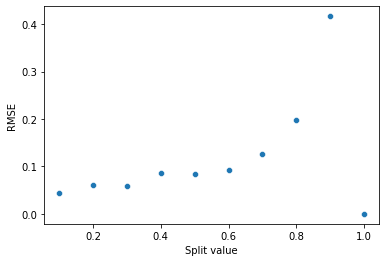

In [231]:
sns.scatterplot(split, rmse_score)
plt.xlabel("Split value")
plt.ylabel("RMSE")


C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RMSE')

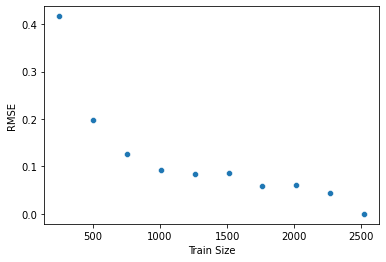

In [232]:
sns.scatterplot(train_len, rmse_score)
plt.xlabel("Train Size")
plt.ylabel("RMSE")

# d) the standardization was the best improvement of RMSE from 0.217 to 0.125
# min max also helped and produced RMSE of 0.127, normalization performed much worse, however

In [233]:
from sklearn import preprocessing

## i)

In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [253]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=50, min_samples_leaf=2)
DTR.fit(X_scaled_train,Y_train)
DTR.score(X_scaled_test,Y_test)


# DTR_best = grid_search.best_estimator_ 

y_pred= DTR.predict(X_scaled_test) 

rmse = mean_squared_error(y_pred, Y_test)
print('RMSE: ', rmse)

RMSE:  0.12510437798192933


## ii)

In [254]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

X_scaled_train = min_max_scaler.transform(X_train)
X_scaled_test = min_max_scaler.transform(X_test)

In [255]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=50, min_samples_leaf=2)
DTR.fit(X_scaled_train,Y_train)
DTR.score(X_scaled_test,Y_test)


# DTR_best = grid_search.best_estimator_ 

y_pred= DTR.predict(X_scaled_test) 

rmse = mean_squared_error(y_pred, Y_test)
print('RMSE: ', rmse)

RMSE:  0.1277312932016237


## iii)

In [256]:
normalize_scaler = preprocessing.Normalizer().fit(X_train)

X_scaled_train = normalize_scaler.transform(X_train)
X_scaled_test = normalize_scaler.transform(X_test)

In [257]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=50, min_samples_leaf=2)
DTR.fit(X_scaled_train,Y_train)
DTR.score(X_scaled_test,Y_test)


# DTR_best = grid_search.best_estimator_ 

y_pred= DTR.predict(X_scaled_test) 

rmse = mean_squared_error(y_pred, Y_test)
print('RMSE: ', rmse)

RMSE:  39.81077328755356
